# 종목 코드 읽기

## 방법1 : 파일을 다운로드 한 뒤, 정보 가져오기

In [21]:
import pandas as pd

krx_list = pd.read_html('./상장법인목록.xls')
#종목코드가 000453일때, 453만 남게 되는데 이를 방지하고자 다음 코드 실행
krx_list[0].종목코드 = krx_list[0].종목코드.map('{:06d}'.format) 
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,디앤디파마텍,347850,자연과학 및 공학 연구개발업,대사성질환 치료제 등,2024-05-02,12월,이슬기,http://www.ddpharmatech.com,경기도
1,유안타제16호스팩,474490,금융 지원 서비스업,금융 지원 서비스(기업인수목적회사),2024-05-02,12월,박병권,NaN,서울특별시
2,제일엠앤에스,412540,특수 목적용 기계 제조업,2차전지 믹싱시스템,2024-04-30,12월,이영진,http://www.jeilm.co.kr,경기도
3,삐아,451250,기타 화학제품 제조업,색조화장품,2024-04-25,12월,박광춘,http://www.bbiacosmetic.com/,인천광역시
4,하나33호스팩,475250,금융 지원 서비스업,기업인수합병,2024-04-24,12월,박태한,NaN,서울특별시
...,...,...,...,...,...,...,...,...,...
2684,유한양행,000100,의약품 제조업,"의약품(삐콤씨, 안티푸라민, 렉라자, 로수바미브, 코푸시럽 등), 생활용품(유한락스...",1962-11-01,12월,대표이사 조욱제,http://www.yuhan.co.kr,서울특별시
2685,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,"신영수, 민영학 (각자 대표)",http://www.cjlogistics.com,서울특별시
2686,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2687,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


## 방법2 : 사이트에서 바로 가져오기

In [30]:
# 텍스트 인코딩 방식 확인하기 
import chardet
import urllib.request

with urllib.request.urlopen('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13') as f:
    response = f.read()

print(chardet.detect(response))

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


encoding 방식을 확인하고 아래의 코드를 작성한다.

In [20]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', encoding='EUC-KR')[0]
df.종목코드 = df.종목코드.map('{:06d}'.format)
df = df.sort_values(by = '종목코드')
df

C:\Users\alswj\anaconda3\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
1000,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,유준하,http://www.dong-wha.co.kr,서울특별시
2008,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,노성석,http://www.krmotors.com,경상남도
2018,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
354,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 이영준",http://www.samyang.com,서울특별시
2080,하이트진로,000080,알코올음료 제조업,소주,2009-10-19,12월,김인규,http://www.hitejinro.com,서울특별시
...,...,...,...,...,...,...,...,...,...
2455,JTC,950170,종합 소매업,"식품류, 생활용품류, 화장품류 (사후면세업)",2018-04-06,02월,구철모,http://www.groupjtc.com/korean/,일본
117,고스트스튜디오,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,"손창욱, 최명규 (공동대표)",http://www.ghoststudio.net,홍콩
811,소마젠,950200,"그외 기타 전문, 과학 및 기술 서비스업","유전체 분석 서비스 (NGS, CES 등)",2020-07-13,12월,홍수,http://psomagen.com,미국
388,프레스티지바이오파마,950210,자연과학 및 공학 연구개발업,바이오시밀러 및 항체의약품 신약,2021-02-05,06월,박소연,http://www.prestigebiopharma.com,싱가포르


## 네이버 금융 웹사이트에서 정보 가져오기
네이버 금융 : https://finance.naver.com/

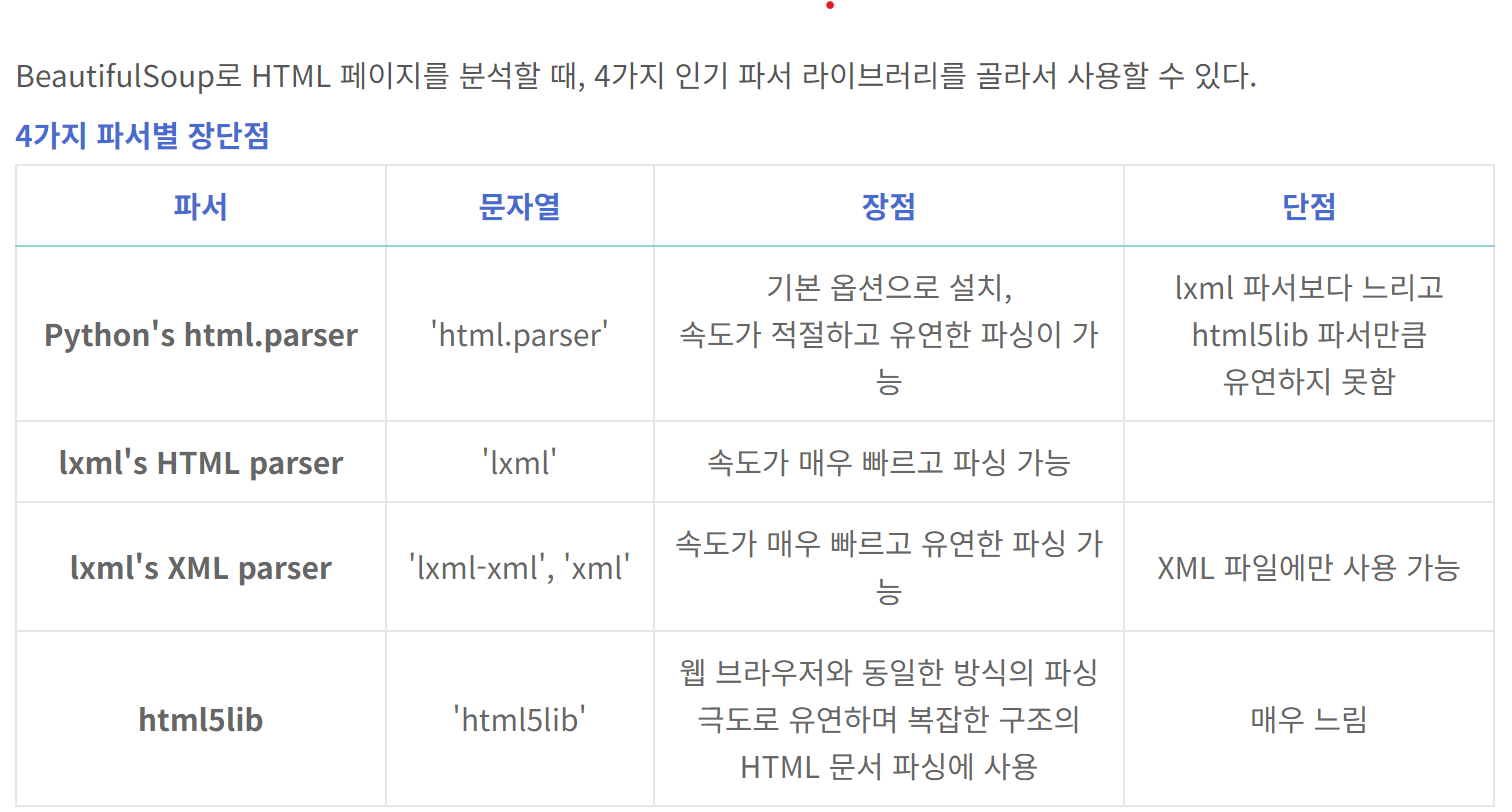
BeautifulSoup(html, 'lxml') 에 있는 'lxml'는 파서를 의미한다.

In [57]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'# 068270는 셀트리온의 종목코드이다.

html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text

html = BeautifulSoup(html, 'lxml')
pgrr = html.find('td', class_='pgRR') #<td> 에서 속성이 'pgRR' 인 것. pgRR = Page Right Right = 맨 마지막 페이지
print(pgrr.a['href'])

/item/sise_day.nhn?code=068270&page=465


url로 들어가 ctrl + U 를 눌러 html을 직접 확인하면서 읽으면 위 코드를 더 잘 이해할 수 있다.

In [98]:
# 마지막 페이지 수 반환
s = str(pgrr.a['href']).split('=')
last_page = s[-1]
last_page

'465'

In [99]:
# 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = pd.concat([df,pd.read_html(html, header=0)[0]])

df = df.dropna()
df

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])
C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated

C:\Users\alswj\AppData\Local\Temp\ipykernel_1552\3374926578.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df,pd.read_html(html, header=0)[0]])


,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.05.02,187500.0,"하락 1,500",187900.0,190700.0,187000.0,520725.0
2,2024.04.30,189000.0,"상승 5,300",183700.0,191200.0,183000.0,1227117.0
3,2024.04.29,183700.0,"상승 7,100",178500.0,183800.0,178500.0,642499.0
4,2024.04.26,176600.0,하락 800,177500.0,178800.0,176300.0,221176.0
5,2024.04.25,177400.0,"하락 2,100",177700.0,179000.0,176100.0,307643.0
...,...,...,...,...,...,...,...
1,2005.07.25,5650.0,상승 70,5500.0,5950.0,5500.0,61036.0
2,2005.07.22,5580.0,하락 160,5850.0,5850.0,5530.0,69921.0
3,2005.07.21,5740.0,하락 810,6450.0,6580.0,5730.0,182685.0
4,2005.07.20,6550.0,"하한가 1,150",7690.0,7690.0,6550.0,422688.0


## 셀트리온 종가 차트

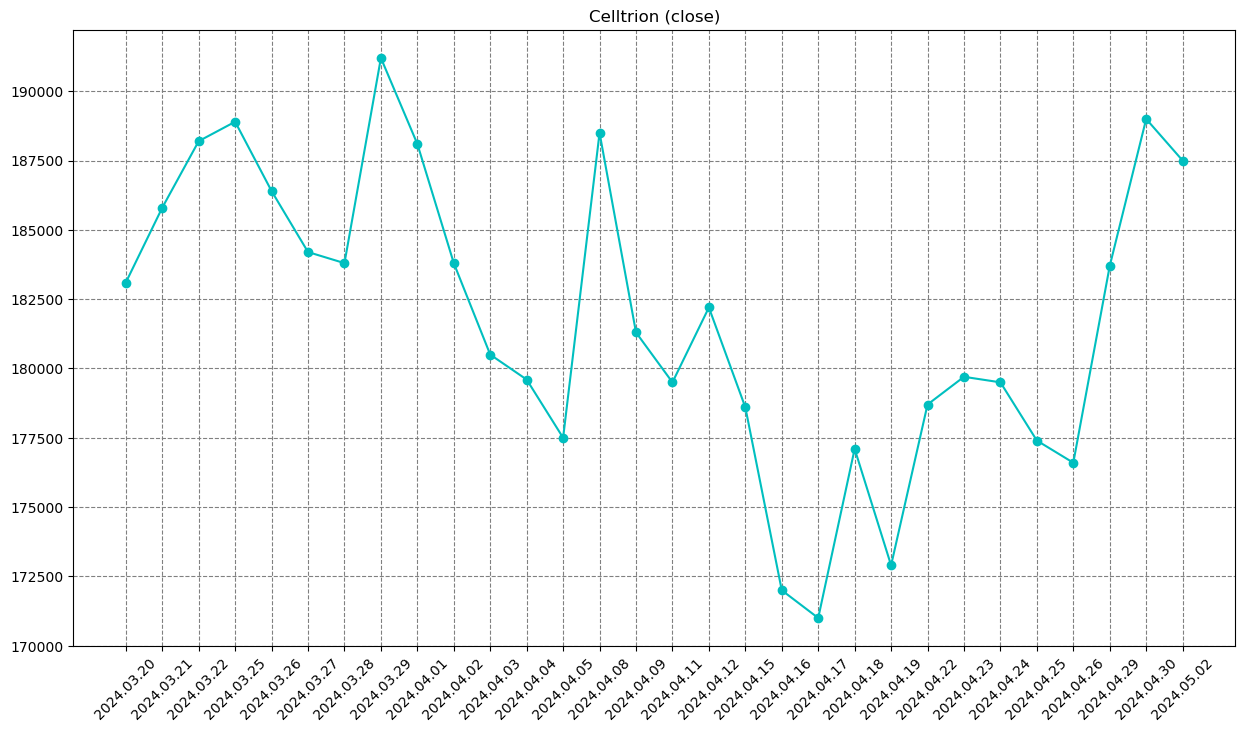

In [109]:
from matplotlib import pyplot as plt

sub_df = df.iloc[0:30] #최근 30개의 종가 데이터 활용
sub_df = sub_df.sort_values(by='날짜')


plt.figure(figsize=(15, 8))
plt.title('Celltrion (close)')
plt.xticks(rotation=45)
plt.plot(sub_df['날짜'], sub_df['종가'], 'co-') #co : 청록색 원으로, - : 각 좌표를 실선으로 연결
plt.grid(color='gray', linestyle='--')
plt.show()

## 셀트리온 캔들 차트

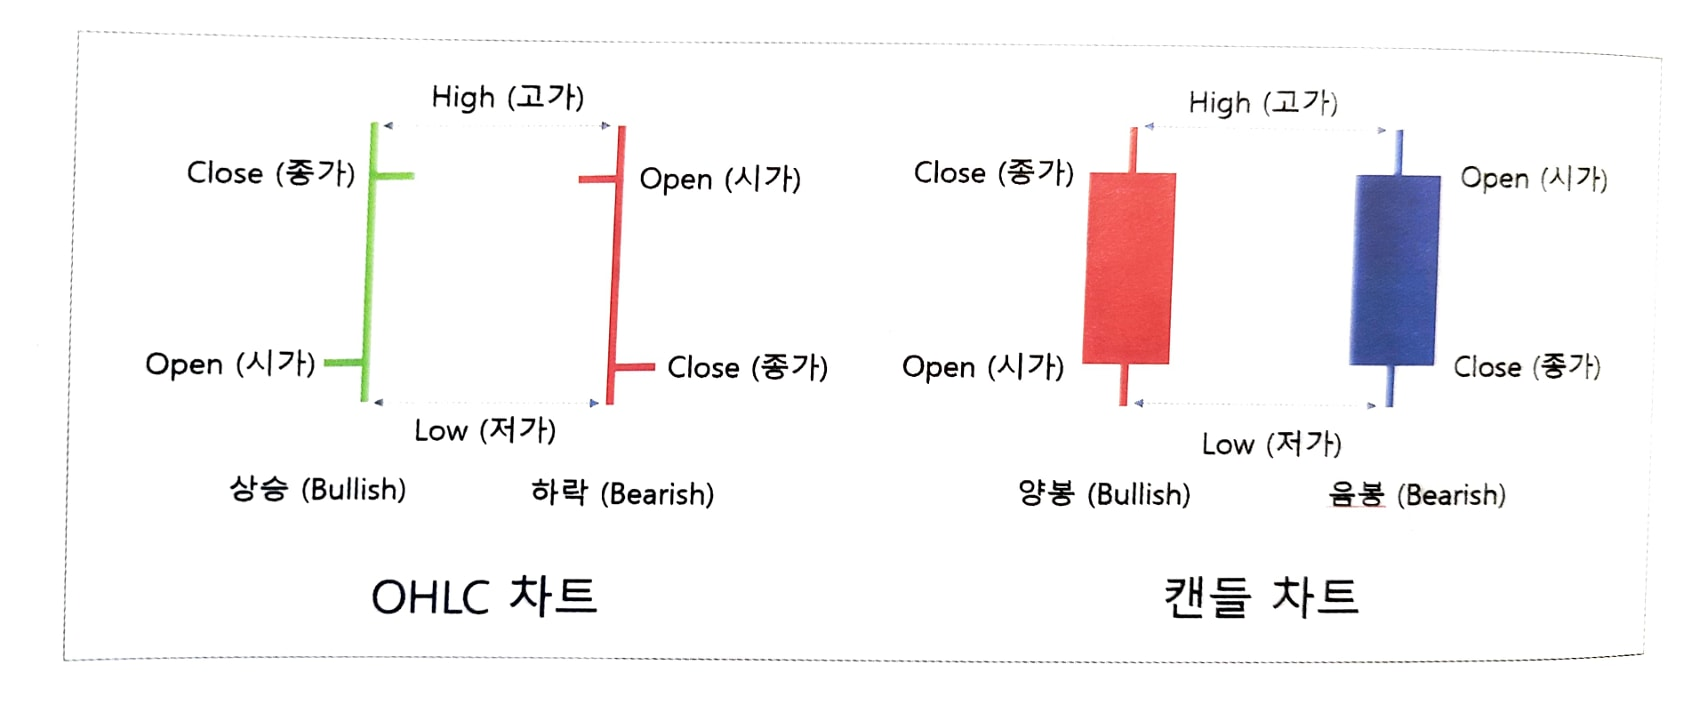

In [111]:
pip install mplfinance

  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


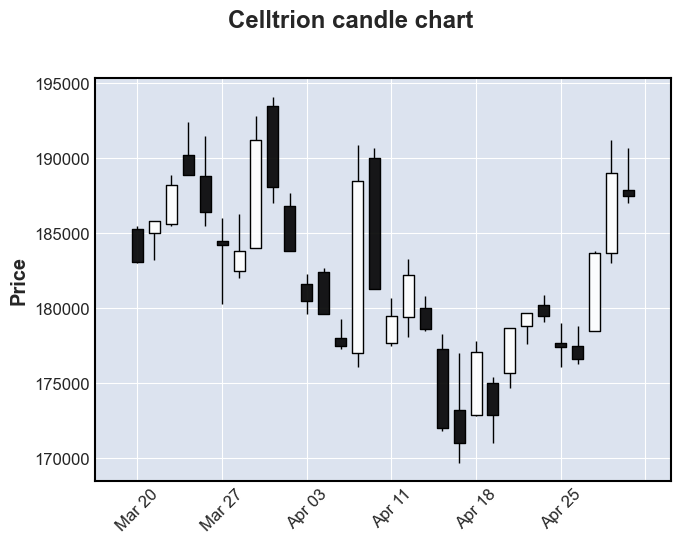

In [115]:
import mplfinance as mpf

sub_df = df.iloc[0:30] #최근 30개의 종가 데이터 활용
sub_df = sub_df.sort_values(by='날짜')
sub_df = sub_df.rename(columns = {'날짜': 'Date','시가':'Open', '고가':'High', '저가':'Low','종가':'Close', '거래량':'Volume'})
sub_df.index = pd.to_datetime(sub_df.Date)
sub_df = sub_df[['Open', 'High', 'Low', 'Close', 'Volume']]

mpf.plot(sub_df, title = 'Celltrion candle chart', type= 'candle')

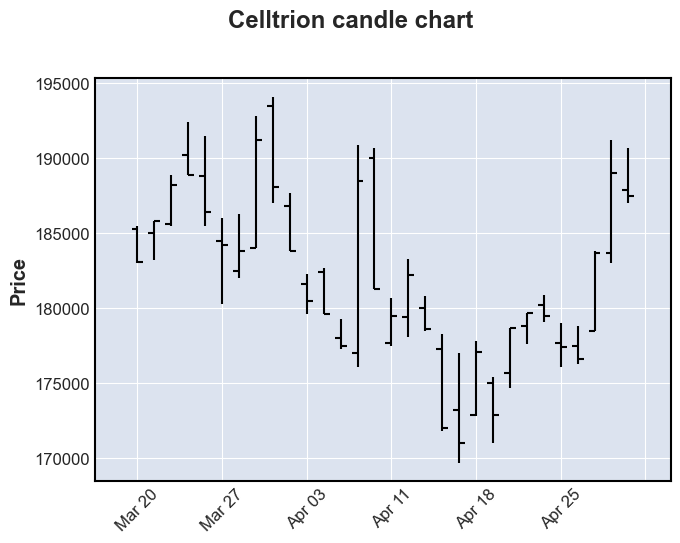

In [116]:
mpf.plot(sub_df, title = 'Celltrion candle chart', type= 'ohlc')

### 캔들 커스터마이징

mav: 이 매개변수는 이동평균선(moving average)을 나타내며, 튜플 형태로 이동평균선의 기간을 지정합니다. 여기서는 (2, 4, 6)으로 설정되어 있으므로 이동평균선이 2일, 4일, 6일 간격으로 표시됩니다.

volume: 이 매개변수는 거래량(volume)을 표시할지 여부를 지정합니다. True로 설정되어 있으므로 거래량이 표시됩니다. (맨 밑 그래프)

<Mpf_Figure size 2000x800 with 0 Axes>

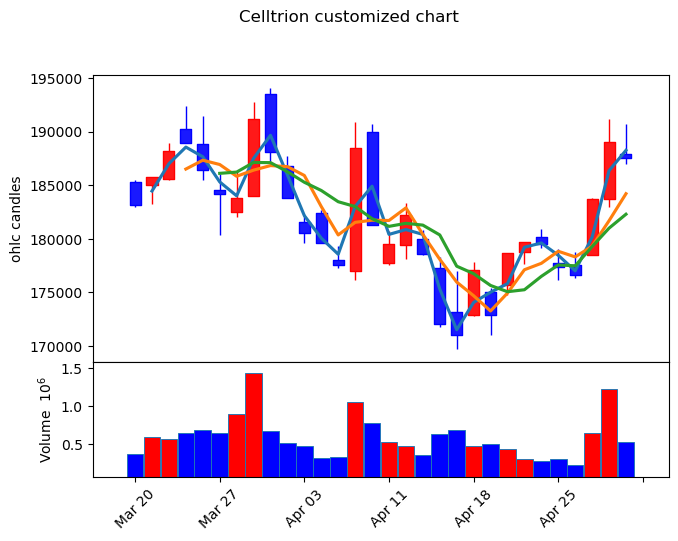

In [125]:
kwargs = dict(title = 'Celltrion customized chart', type = 'candle',
             mav=(2,4,6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True) #상승은 빨간색, 하락은 파란색으로
s = mpf.make_mpf_style(marketcolors=mc)
mpf.figure(figsize=(20, 8))
mpf.plot(sub_df, **kwargs, style=s)